# Importing Required Libraries

In [1]:
import numpy as np
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
# from google.colab import drive
# drive.mount('/content/gdrive')
# from google.colab import files

from skimage import color

# Model Constants

In [28]:
# parameters for data
n_classes = 100

# Parameters for training
C=5
epochs = 10000

# Loading Cifar100 data

In [3]:
(X, y), (X_test, y_test) = cifar100.load_data()

print("The shape of X_train : ", X.shape)
print("The shape of y_train : ", y.shape)
print("The shape of X_test : ", X_test.shape)
print("The shape of y_test : ", y_test.shape)

fine_label_list =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
                    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
                    'dinosaur', 'dolphin', 'elephant', 'flatensorflowish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
                    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
                    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
                    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
                    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
                    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

#fine_label_list =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']                  
                  

The shape of X_train :  (50000, 32, 32, 3)
The shape of y_train :  (50000, 1)
The shape of X_test :  (10000, 32, 32, 3)
The shape of y_test :  (10000, 1)


# Preprocessing Data

In [4]:
def unison_shuffled_copies(a, b):
  randomize = np.arange(len(a))
  np.random.shuffle(randomize)
  x = a[randomize]
  y = b[randomize]
  return x, y

# Shuffling dataset
X, y = unison_shuffled_copies(X, y)

y = y.reshape(-1)
y_test = y_test.reshape(-1)
print(y.shape)
print(y_test.shape)

(50000,)
(10000,)


# Visualizing Some Samples

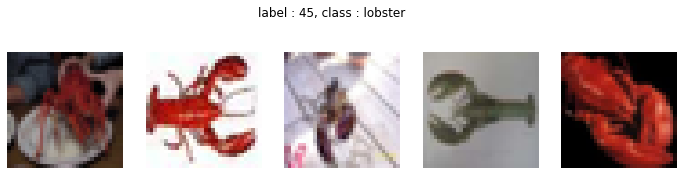

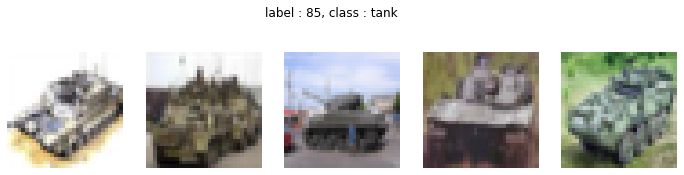

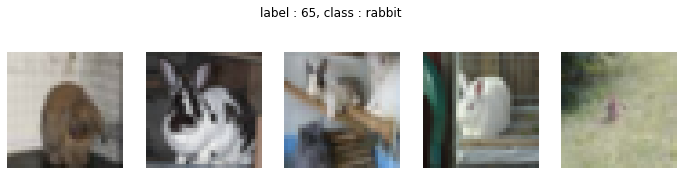

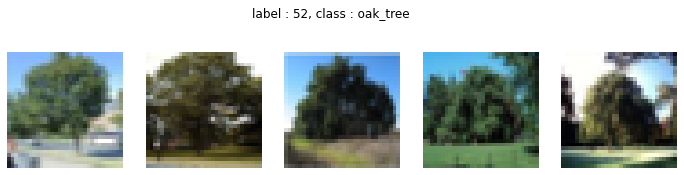

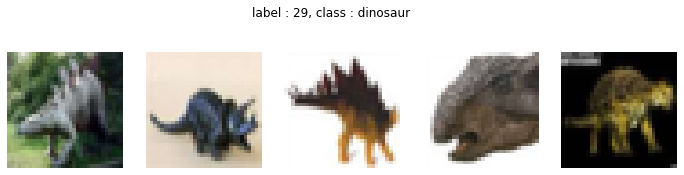

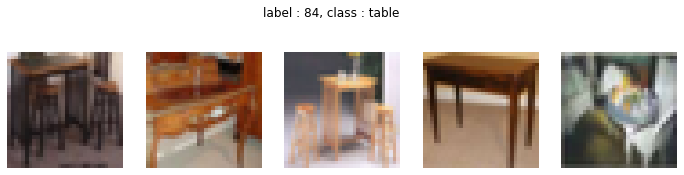

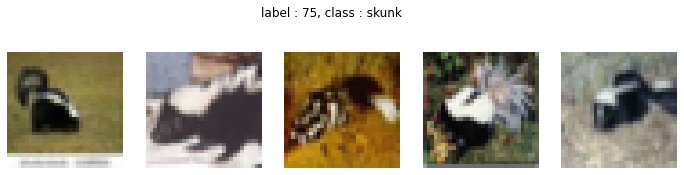

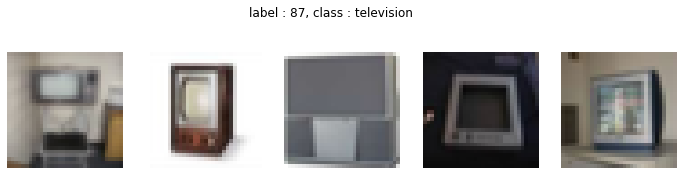

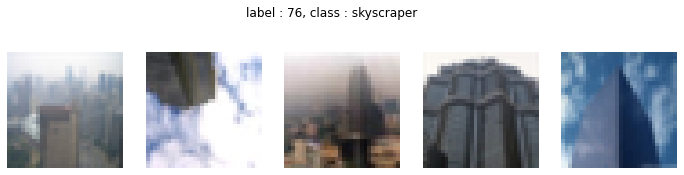

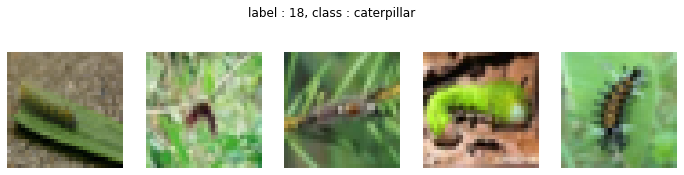

In [5]:
num_classes= 10 # Number of classes visualized
num_samples= 5 # Number of samples from each class

class_plotted = np.random.choice(range(n_classes),num_classes, replace = False)

for i in range(len(class_plotted)):
    image_samples = X[y.reshape(-1) == class_plotted[i]][:num_samples]
    fig, ax = plt.subplots(nrows = 1, ncols = num_samples, figsize=(12,3) )
    fig.suptitle("label : %d, class : %s" % (class_plotted[i], fine_label_list[class_plotted[i]]) )
    for j in range(num_samples):
        ax[j].imshow(image_samples[j])
        ax[j].axis('off') 

plt.show()

# Visualizing HOG

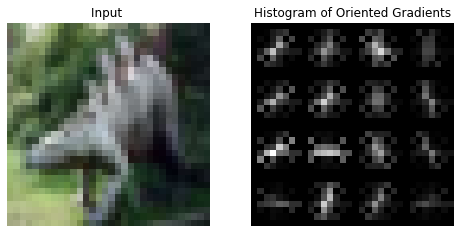

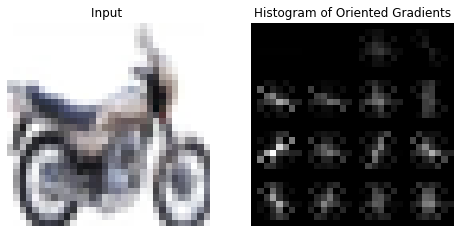

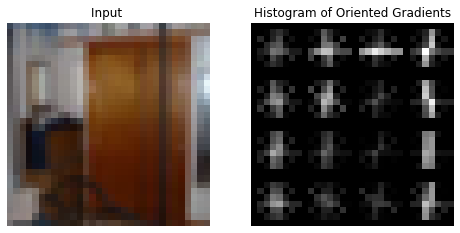

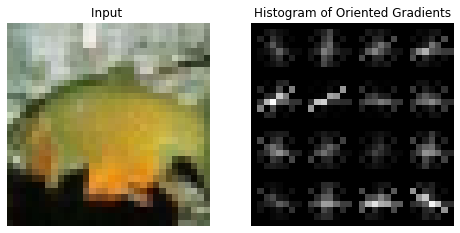

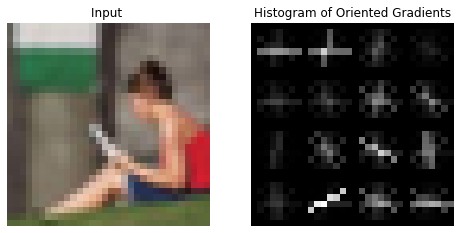

In [9]:
for i in range(5):
  image = X[i]
  fd, hog_image = hog(image, visualize=True, multichannel=True)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

  ax1.axis('off')
  ax1.imshow(image, cmap=plt.cm.gray)
  ax1.set_title("Input ")

  ax2.axis('off')
  ax2.imshow(hog_image, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')
  plt.show()

# Image Preprocessing

In [10]:
train_HOG = []
test_HOG = []

# X = [ color.rgb2gray(i) for i in X]
# X_test = [ color.rgb2gray(i) for i in X_test]

for i in range(len(X)):
  fd = hog( X[i], multichannel=True)
  train_HOG.append(fd)

for i in range(len(X_test)):
  fd = hog( X_test[i], multichannel=True)
  test_HOG.append(fd)

train_HOG = np.array(train_HOG)
test_HOG = np.array(test_HOG)

# Training Model

In [22]:
model = LinearSVC( C=C , max_iter = epochs)
model.fit(train_HOG, y)
train_acc = model.score(train_HOG, y)*100

# Testing Model

In [23]:
y_pred = model.predict(test_HOG)
test_accuracy = accuracy_score(y_test, y_pred=y_pred)*100
print(classification_report(y_test, y_pred))
print("Accuracy: "+str(test_accuracy)+ " %")
print('\n')

              precision    recall  f1-score   support

           0       0.26      0.54      0.35       100
           1       0.12      0.08      0.10       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.28      0.35      0.31       100
           6       0.08      0.06      0.07       100
           7       0.07      0.04      0.05       100
           8       0.20      0.60      0.31       100
           9       0.25      0.60      0.35       100
          10       0.14      0.23      0.18       100
          11       0.12      0.04      0.06       100
          12       0.22      0.14      0.17       100
          13       0.21      0.17      0.19       100
          14       0.09      0.07      0.08       100
          15       0.04      0.01      0.02       100
          16       0.20      0.32      0.25       100
          17       0.14    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test Metrics

In [27]:
conf_matrix = confusion_matrix(y_true= y_test, y_pred= y_pred
                               )
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

ids = ['TP rate', 'TN rate',  'Precision',  'N prediction value', 'FP rate', 'FN rate' ,'FD rate', 'Acc']


df = pd.DataFrame( { 'TP': TP.round(3)
                   , 'TN': TN.round(3)
                   , 'FN': FN.round(3)
                   , 'FP': FP.round(3)
                   , ids[0]: TPR.round(3)
                   , ids[1]: TNR.round(3)
                   , ids[2]: PPV.round(3)
                   , ids[3]: NPV.round(3)
                   , ids[4]: FDR.round(3)
                   , ids[5]: FNR.round(3)
                   , ids[6]: FDR.round(3)
                   , ids[7]: ACC.round(3) }
                  , index = fine_label_list  
                  )
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


,TP,TN,FN,FP,TP rate,TN rate,Precision,N prediction value,FP rate,FN rate,FD rate,Acc
apple,54,9748,46,152,0.54,0.985,0.262,0.995,0.738,0.46,0.738,0.980
aquarium_fish,8,9841,92,59,0.08,0.994,0.119,0.991,0.881,0.92,0.881,0.985
baby,0,9898,100,2,0.00,1.000,0.000,0.990,1.000,1.00,1.000,0.990
bear,0,9899,100,1,0.00,1.000,0.000,0.990,1.000,1.00,1.000,0.990
beaver,0,9893,100,7,0.00,0.999,0.000,0.990,1.000,1.00,1.000,0.989
...,...,...,...,...,...,...,...,...,...,...,...,...
whale,10,9848,90,52,0.10,0.995,0.161,0.991,0.839,0.90,0.839,0.986
willow_tree,3,9822,97,78,0.03,0.992,0.037,0.990,0.963,0.97,0.963,0.982
wolf,20,9804,80,96,0.20,0.990,0.172,0.992,0.828,0.80,0.828,0.982
woman,3,9856,97,44,0.03,0.996,0.064,0.990,0.936,0.97,0.936,0.986


# Visualizing Test Results

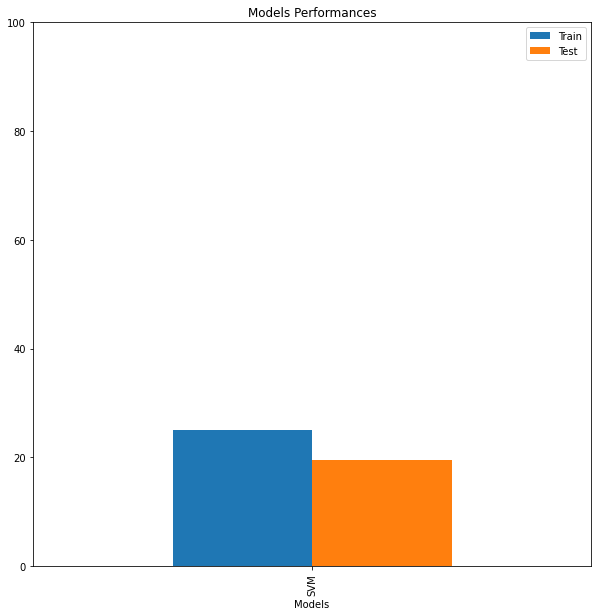

In [25]:
df = pd.DataFrame([['SVM', train_acc , test_accuracy]],
                  columns=['Models','Train', 'Test'])
df.plot(x='Models',
        kind='bar',
        stacked=False,
        figsize=(10,10),
        ylim=(0,100),
        title='Models Performances')